In [98]:
import scipy
import numpy as np
import matplotlib as plt
import pandas
import sklearn
from pandas import read_csv
import matplotlib.pyplot as pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import os
import graphviz
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

The scikit-learn version is 0.22.1.


## Initial Data Observations

In [65]:
df = read_csv(r'X:\SLC\Term 2\ADMN 5016\hospitalData.csv')

In [66]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


id column is not needed, so it is dropped in the following lines.

In [67]:
df.drop(['id'], axis = 1, inplace = True)

In [68]:
print(df.shape)

(569, 31)


Seeing that the column has indeed dropped as dataframe is now 569 rows by 31 columns instead of 32 like above

In [69]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

No nulls in any column, excellent news as data is ready to be manipulated. Important to note the data types of the columns

In [71]:
print(df.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

Summary statistics taken

In [72]:
#Too much noise due to too many columns
#scatter_matrix(df)
#pyplot.show()

In [73]:
#Same as previous plot
#df.hist()
#pyplot.show()

## Creating the Training and Validation partitions

In [74]:
#Splitting the dataset into training and validation partitions
array = df.values
X = array[:,1:]
Y = array[:,0]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)

I chose to make the testing size 60% of the dataset to give the algorithms ample space to learn.Random state set to 1 throughout the excersize to maintain integrity

## K Nearest Neighbour Algorithm

In [75]:
#Running K nearest neighbours
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)

In [76]:
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))

[[197  18]
 [ 19 108]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       215
         1.0       0.86      0.85      0.85       127

    accuracy                           0.89       342
   macro avg       0.88      0.88      0.88       342
weighted avg       0.89      0.89      0.89       342



197 cases correctly listed as benign, 18 incorrectly labelled as benign. 19 cases incorrectly labelled malignant, 108 correctly listed as malignant.
Weighted Precision accuracy of 88%, so a 12% error rate ((1-.88)*100)

In [103]:
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_validation)
    error.append(np.mean(pred_i != Y_validation))

Above, I plotted for multiple values of neighbors to see which was the most accurate to use for the algorithm.

([<matplotlib.axis.XTick at 0x2b6d562e390>,
 <a list of 19 Text xticklabel objects>)

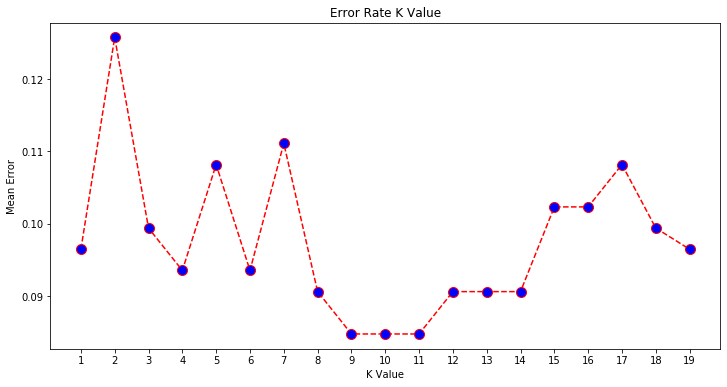

In [79]:
#Looking for the optimal k value
pyplot.figure(figsize=(12, 6))
pyplot.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
pyplot.title('Error Rate K Value')
pyplot.xlabel('K Value')
pyplot.ylabel('Mean Error')
pyplot.xticks(np.arange(1, 20, step=1))

The plot suggests that neighbors of values 9,10 and 11 produce the least amount of errors. 9 chosen.

In [80]:
#using n_neighbors = 9
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)

In [81]:
#Printing new Confusion Matrix with optimal neighbors
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))

[[204  11]
 [ 18 109]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       215
         1.0       0.91      0.86      0.88       127

    accuracy                           0.92       342
   macro avg       0.91      0.90      0.91       342
weighted avg       0.91      0.92      0.91       342



204 cases correctly listed as benign, 11 incorrectly labelled as benign. A positive increases is seen here. 18 cases incorrectly labelled malignant, 109 correctly listed as malignant.
We observe a decrease in the cases of false positives. Weighted Precision accuracy of 91%, so a 9% error rate ((1-.91)*100). Precision has increased 3% with the optimal neighbors value.

## Decision Trees

In [84]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)

In [85]:
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))

[[190  25]
 [ 14 113]]
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91       215
         1.0       0.82      0.89      0.85       127

    accuracy                           0.89       342
   macro avg       0.88      0.89      0.88       342
weighted avg       0.89      0.89      0.89       342



190 cases correctly listed as benign, 25 incorrectly labelled as benign. 14 cases incorrectly labelled malignant, 113 correctly listed as malignant.
Weighted Precision accuracy of 89%, so a 11% error rate ((1-.89)*100). Fairly similar to the non-optimal KNN algorithm above.

In [86]:
#Prunning via a cost complexity parameter
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
var = path
print(var)

{'ccp_alphas': array([0.        , 0.00437313, 0.0086008 , 0.01711499, 0.03205752,
       0.3933537 ]), 'impurities': array([0.        , 0.00874626, 0.02594786, 0.04306284, 0.07512036,
       0.46847406])}


I am essentially looking to prune nodes from the Decision Tree by tying the decision to a recursive program that seeks to remove the node with the weakest alpha value. 
This allows us to hone in on the most effective alpha rate and rerun our algorithm to hopefully improve its accuracy

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

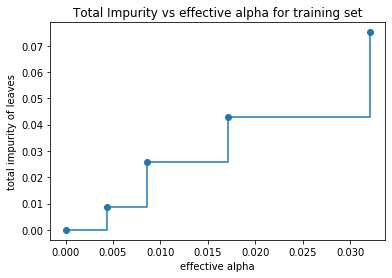

In [87]:
fig, ax = pyplot.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

The graph shows that as alpha increases, the number of higher the impurity of the nodes. In this case impurity refers to the nodes becoming homogenous, and as a result merging together. We are looking for the best possible alpha that improves our precision, but also minimizes our impurity.

In [88]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3933537028892568


After the removal of all the weakest nodes, we are left with a 3 node tree with an alpha of. .032. We can remove this as it is the last tree left, but it is not the optimal.

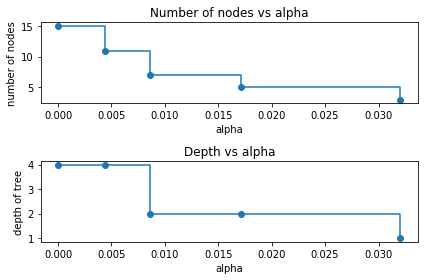

In [89]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = pyplot.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Showing the number of nodes as alpha increases.

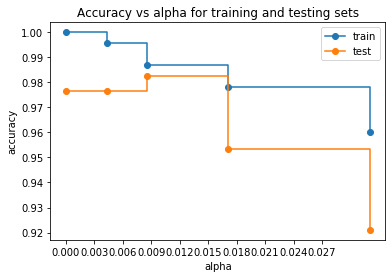

In [93]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_validation, Y_pred) for clf in clfs]

fig, ax = pyplot.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
pyplot.xticks(np.arange(0, .03, step=0.003))
pyplot.show()

We create the above graph to look for optimal alpha. We see optimal alpha at .009. when train and test, our validation data, begin to merge. At that point is our optimal alpha we will be using 

In [94]:
classifier = DecisionTreeClassifier(ccp_alpha=0.009)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)

In [95]:
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))

[[190  25]
 [ 12 115]]
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       215
         1.0       0.82      0.91      0.86       127

    accuracy                           0.89       342
   macro avg       0.88      0.89      0.89       342
weighted avg       0.90      0.89      0.89       342



After running the Decision Tree algorithm again, we see no change in the accuracy of the benign precision, 190 correctly predicted benign and 25 incorrectly predicted benign.
We do however see an increase in the precision of the prediciton of malignant cases. In this case, 12 incorrectly labelled malignant, down from 15, and 115 correctly labelled malignant
up from 113. Weighted Precision is also up 1%, from 89% to 90%, dropping our error to 10% ((1-.90)*100)

However, it appears our KNN with optimal neighbors is more precise than our optimal Decision Tree.

## Naive Bayes

In [79]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
Y_pred = classifier.predict(X_validation)

In [81]:
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))

[[201  14]
 [ 13 114]]
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       215
         1.0       0.89      0.90      0.89       127

    accuracy                           0.92       342
   macro avg       0.91      0.92      0.92       342
weighted avg       0.92      0.92      0.92       342



Straight forward Naive Bayesian algorithm. I would have loved to run a Bernoulli model here as the ansers are binary, but sadly time was short and the implementation unclear.
So for Naive Bayes, we see the model corredtly predicted 201 benign cases and incorrectly predicted 14 cases as 14. It incorrectly predicted 13 cases as malignant and correctly
predicted 114 malignant cases. The weighted Accuracy of the Naive Bayes Algorithm was 92% leaving an error of 8% ((1-.92)*100)

## Why did you get the results you did? Compare the different algorithms.
KNN was the simplest to run and was able to account for the data fairly well, and in this way I think that it may have had the easiest time running the data. On the other hand,
The data may not have been long enough for Decision Trees to really pin down its analysis as it was only 569 entries long. It could be that the algorithm simply needs more data to 
become more precise. As for Bayes, I believe it is a powerful algorithm for this type of analysis as it is associating the words "Malignant" and "Benign" with each keywords or phrases
in each entry and using that to guide its decision. In this way, it was able to be the most precise with any form of adjustments

## What sort of changes might you make to each of those algorithms to improve performance?
As noted above, I would change the Naive Bayes to a Bernoulli Bayes Algorithm as Bernoulli was specifically designed for boolean values, like what we have from the diagnosis column.
As for the other two algorithms, I think I would add more pruning methods to the Decision Tree to improve its accuracy and perhaps veracity. KNN, there might be a way tha I do not 
know of that would enable a more leaborate or precise way of finding the ideal neighbor value, though I do not know how you would be able to make it more specific. Maybe apply it to
a greater range.

 ## Would cross-validation help to achieve more accurate predictions?
 Cross validation would be useful tool for this exercise in my opinion as it would allow us to cross examine the most useful inputs for all the algorithms to come up with a more tailored approach to determing malignant and benign cases as opposed to having to sift through the entire dataset and try to determine the useful variables and the noisy ones.

## How much performance was due to the problems you chose? How about the values you choose for learning rates, pruning methods?
The problem lent itself to being very open to the models as we can see with precision rates well above 80%. However, due to the seriosuness of the material that is being handled,
perhaps a more robust form of learning could be applied to achieve even more precise preditions. As we saw from the pruning methods, we saw a slight uptick in our algorithms performances, so in this way perhaps with more pruning and cross-validation we would be able to achieve precision more befiting to such a serious topic as cancer. Our values that were
specifically chosen when pruning lead to increases so it is encouraging to know that these models can be improved upon further with more time and training.

## Which algorithm produced the best results?
The Naive Bayes agorithm produced the best results, when comparing scores accross the board on the confusion matrix. Most notably, it scored the highest f1 score, which is the 
measurement most used when determining an algorithms effictiveness. It is worth mentioning that the optimal KNN values were within .01 of the Naive Bayes results.

## Closing Comments
This was an extremely difficult assingment. In the future I would like to revisit this assignment, armed with more precise and honed tools, and have another attempt at these questions
to see if there would be any improvements to performance in the algorithms. Specifically running the Bernoulli Bayes algorithm and better pruning methods.